In [35]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
from datetime import datetime


# Binance API endpoint for historical data
api_url = 'https://api.binance.com/api/v3/klines'

# Parameters for the API request (Bitcoin, 1 day interval, 1000 data points)
symbol = 'BTCUSDT'
interval = '1d'
limit = 10000

params = {
    'symbol': symbol,
    'interval': interval,
    'limit': limit
}

# Send GET request to Binance API
response = requests.get(api_url, params=params)
data = response.json()

# Extracting relevant data from the API response
df = pd.DataFrame(
    data, columns=[
        'openTime',
        'open',
        'high',
        'low',
        'close',
        'volume',
        'closeTime',
        'quoteAssetVolume',
        'numberOfTrades',
        'takerBuyBaseAssetVolume',
        'takerBuyQuoteAssetVolume',
        'ignore'
    ]
)

# Renaming columns for clarity
df.columns = [
    'Open Time',
    'Open',
    'High',
    'Low',
    'Close',
    'Volume',
    'Close Time',
    'Quote Asset Volume', 
    'Number of Trades',
    'Taker Buy Base Asset Volume',
    'Taker Buy Quote Asset Volume',
    'Ignore'
]


df.drop(
    ['Close Time',
    'Quote Asset Volume',
    'Number of Trades',
    'Taker Buy Base Asset Volume',
    'Taker Buy Quote Asset Volume', 
    'Ignore'],
    axis=1, inplace=True
)

# Converting timestamps to datetime format
df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')

# Converting columns to numeric for further manipulation
cols = df.columns.drop('Open Time')
cols
df[cols] = df[cols].apply(pd.to_numeric)

In [36]:
# Split the data into training and testing sets
train_size = 0.8
test_size = 1 - train_size
train_data, test_data = train_test_split(df, train_size=train_size, test_size=test_size, shuffle=False)

# Extract features and target variable for training and testing
X_train = train_data[['Open', 'High', 'Low', 'Volume']]
y_train = train_data['Close']

X_test = test_data[['Open', 'High', 'Low', 'Volume']]
y_test = test_data['Close']


# Initialize the XGBoost model
model = XGBRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Generate predictions for the test set
predicted_prices = model.predict(X_test)


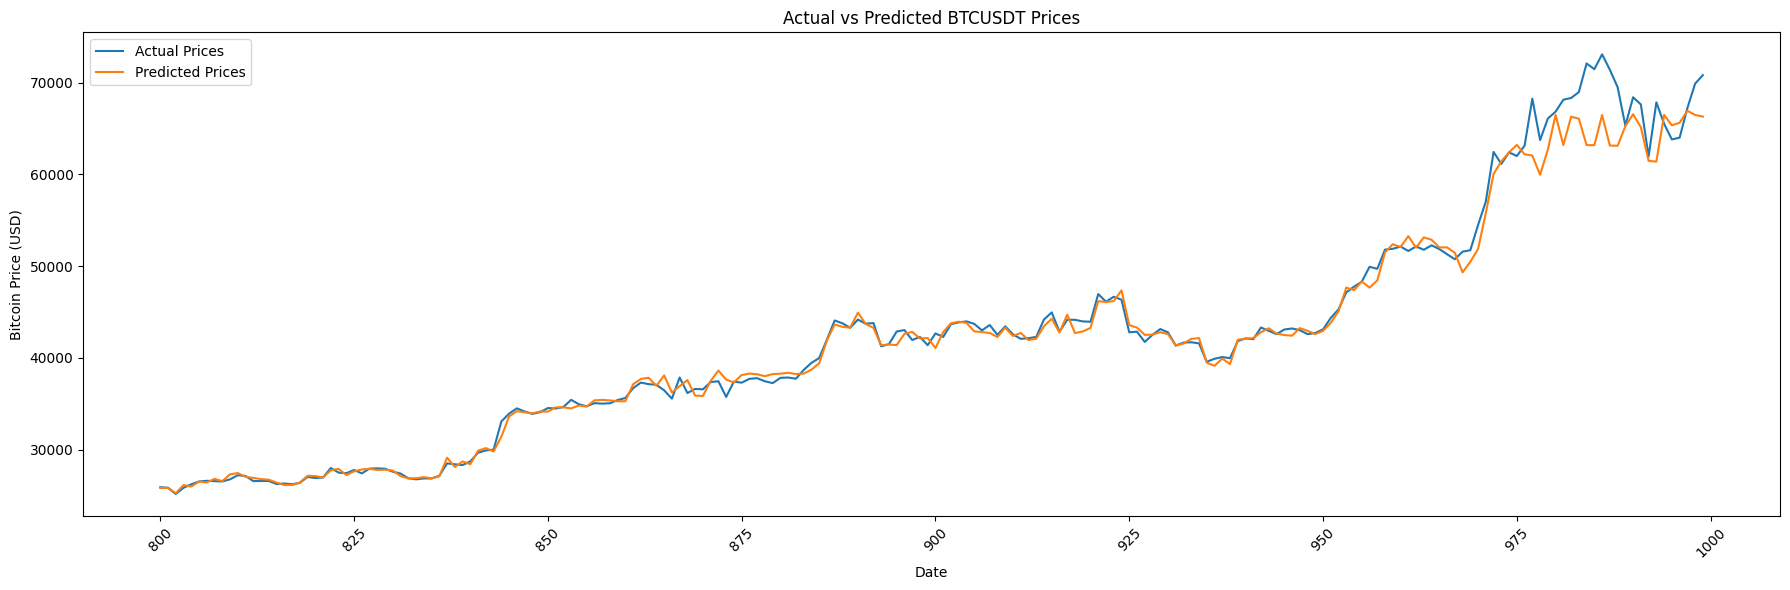

Model Score (R-squared): 0.981287816552314


In [37]:
plt.figure(figsize=(18, 6))
plt.plot(X_test.index, y_test, label='Actual Prices')
plt.plot(X_test.index, predicted_prices, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.title('Actual vs Predicted {} Prices'.format(symbol))
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

score = model.score(X_test, y_test)
print(f"Model Score (R-squared): {score}")

In [38]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predicted_prices)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted_prices)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, predicted_prices)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

# Convert predicted_prices to numpy array and cast to float for compatibility
predicted_prices_np = np.array(predicted_prices, dtype=float)



print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")


Mean Absolute Error (MAE): 846.22970703125
Mean Squared Error (MSE): 2870801.5796597246
Root Mean Squared Error (RMSE): 1694.343996849437
R-squared (R2) Score: 0.981287816552314
